In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.groupby(['sex'])['target'].aggregate(lambda x: x.mean())

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

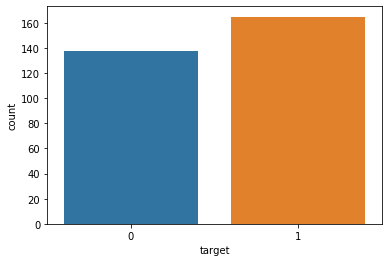

In [5]:
sns.countplot(x="target", data=data)
plt.show()

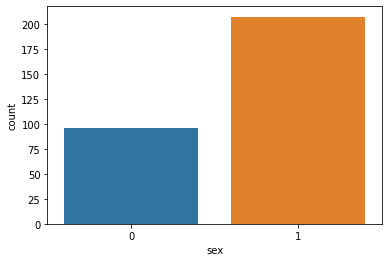

In [6]:
sns.countplot(x='sex', data=data)
plt.show()

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1,10,50,100,500, 1000]},
                    {'kernel': ['linear'], 'C': [1,10,50,100,500, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Score: %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print()
    print(clf.best_params_)
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Score: precision



/home/e/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



{'C': 1, 'kernel': 'linear'}

0.683 (+/-0.092) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.658 (+/-0.122) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.659 (+/-0.067) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.646 (+/-0.099) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.632 (+/-0.088) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.735 (+/-0.069) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.641 (+/-0.091) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.752 (+/-0.096) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.615 (+/-0.047) for {'C': 500, 'gamma': 0.001, 'kernel': 'rbf'}
0.765 (+/-0.106) for {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
0.615 (+/-0.047) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.736 (+/-0.148) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.855 (+/-0.114) for {'C': 1, 'kernel': 'linear'}
0.855 (+/-0.118) for {'C': 10, 'kernel': 'linear'}
0.845 (+/-0.093) for {'C': 50, 'kernel': 'linear'}
0.840 (+/-0.100) for {'C': 100, 'kern

/home/e/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



{'C': 1, 'kernel': 'linear'}

0.675 (+/-0.077) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.637 (+/-0.096) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.647 (+/-0.043) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.632 (+/-0.077) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.628 (+/-0.085) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.718 (+/-0.076) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.639 (+/-0.091) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.734 (+/-0.063) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.044) for {'C': 500, 'gamma': 0.001, 'kernel': 'rbf'}
0.752 (+/-0.093) for {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.044) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.727 (+/-0.122) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.833 (+/-0.101) for {'C': 1, 'kernel': 'linear'}
0.828 (+/-0.087) for {'C': 10, 'kernel': 'linear'}
0.830 (+/-0.082) for {'C': 50, 'kernel': 'linear'}
0.827 (+/-0.077) for {'C': 100, 'kern